# IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report

# LOADING DATASET

In [2]:
dataset=pd.read_csv('C:\\Users\\91638\\Videos\\task 5\\Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
X=dataset.iloc[:,1:-1]
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
Y=dataset.iloc[:,-1]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# SPLITTING DATA

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
X_train

,TV,Radio,Newspaper
71,109.8,14.3,31.7
124,229.5,32.3,74.2
184,253.8,21.3,30.0
97,184.9,21.0,22.0
149,44.7,25.8,20.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [9]:
Y_train

71     12.4
124    19.7
184    17.6
97     15.5
149    10.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 150, dtype: float64

# PREPROCESSING DATA

In [10]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# LOADING LASSO MODEL

In [11]:
lass=Lasso()
lass.fit(X_train,Y_train)

Lasso()

# MODEL EVALUATION

In [12]:
Y_pred=lass.predict(X_test).round()

In [13]:
print("Accuracy :",r2_score(Y_test,Y_pred))

Accuracy : 0.7284135845149337


# VISUALIZE ACTUAL PRICE AND PRIDICTED PRICE

Text(0.5, 1.0, 'Actual price vs pridicted price')

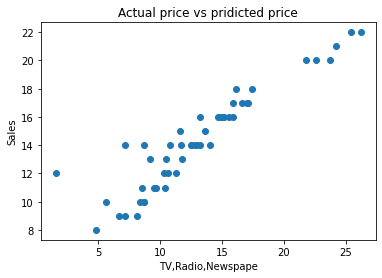

In [16]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("TV,Radio,Newspape")
plt.ylabel("Sales")
plt.title("Actual price vs pridicted price")